<a href="https://colab.research.google.com/github/AhmadRafif22/PCVK_Genap_2023/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDENTITAS MAHASISWA

Nama : Ahmad Rafif Alaudin

Kelas : TI 3G

Nim : 2041720230

Absen : 02

# Jobsheet Pertemuan 11 - Object Detection

# Object Detection

metode yang digunakan

1. Template Matcing
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [7]:
# import library yang dibutuhkan

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Template Maching

menggunakan library OpenCV:

**cv.matchTemplate()** dengan parameter

*   **Image** : citra input
*   **templ** : template yang dicari, ukurannya tidak boleh lebih besar dari citra input
*   **method** : metode dari template matching

jenis metode template matching di OpenCv : 

1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED


(<matplotlib.image.AxesImage at 0x7ffb58936ef0>,
 Text(0.5, 1.0, 'template imaga'))

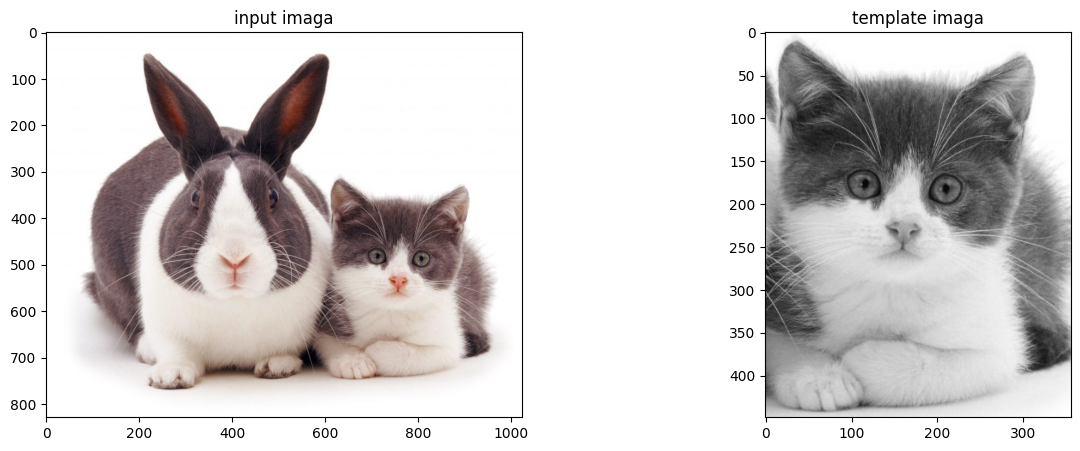

In [6]:
# pre processing

# load citra input

img_input = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/object detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img_input,cv.COLOR_BGR2GRAY)
img_copy = img_input.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/object detection/cat2_templatejpg.jpg',0)

#width dan height
w,h = template.shape[::-1]

#print
f, axarr = plt.subplots(1,2, figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img_input, cv.COLOR_BGR2RGB)), axarr[0].set_title("input imaga")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template imaga")


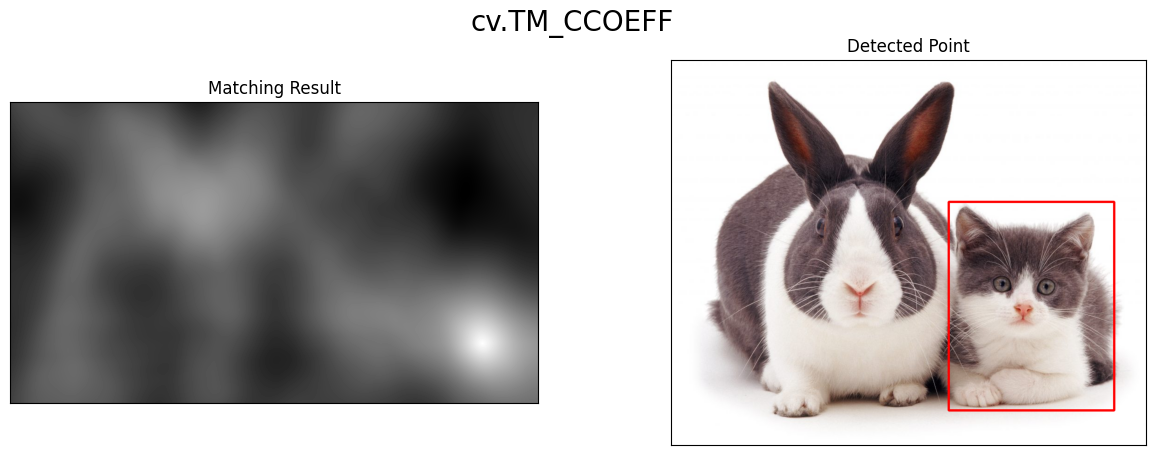

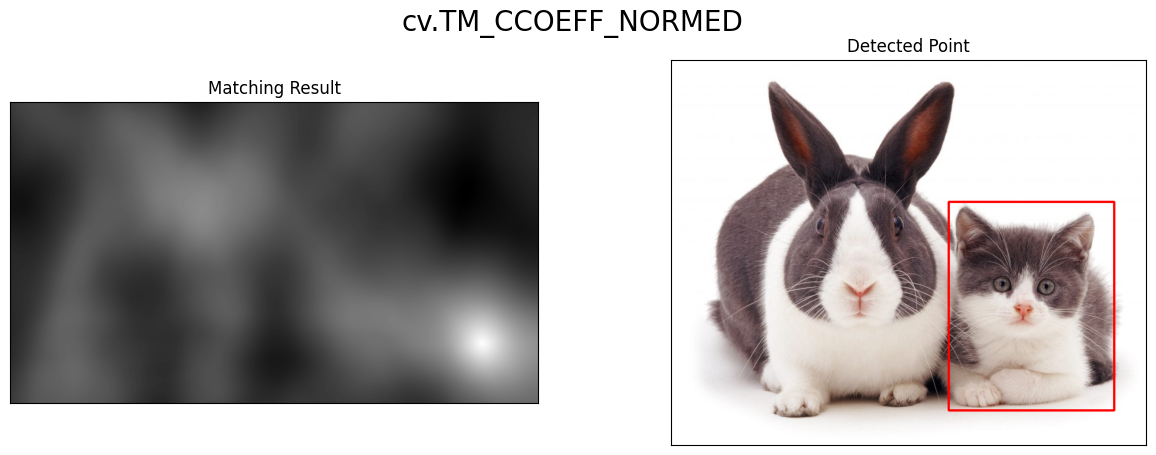

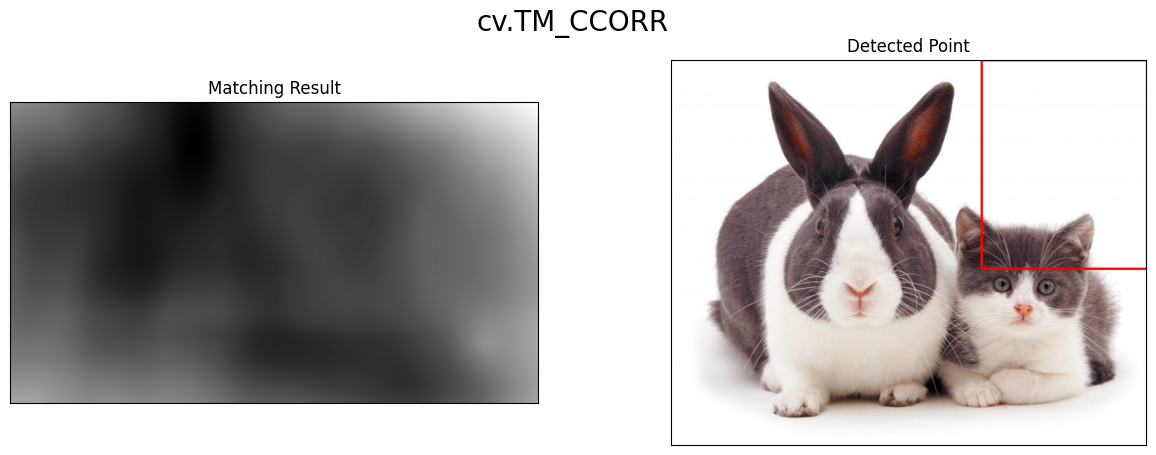

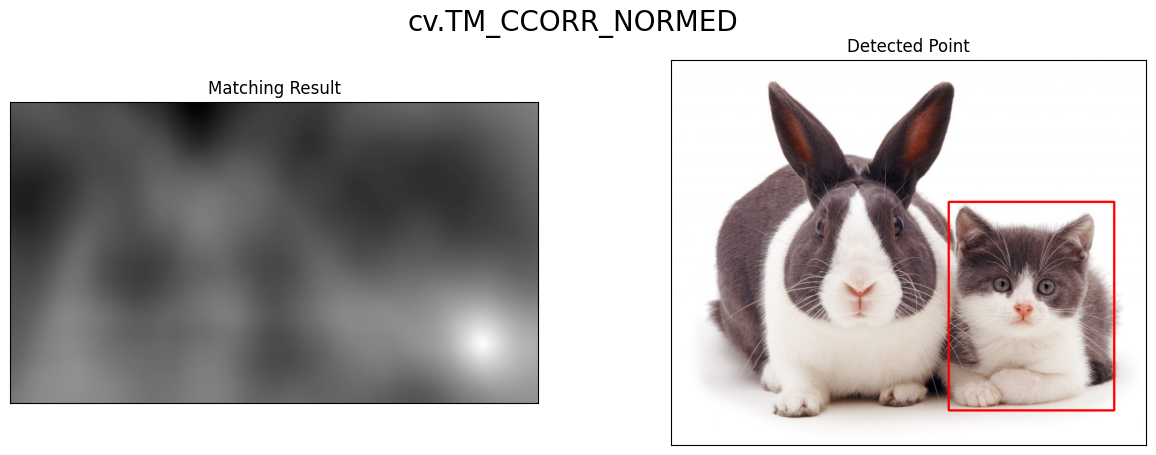

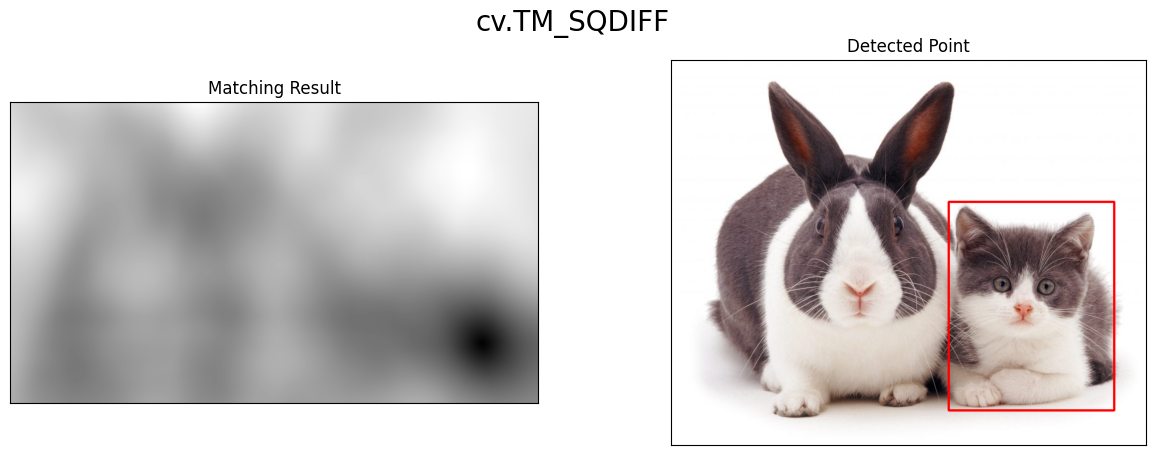

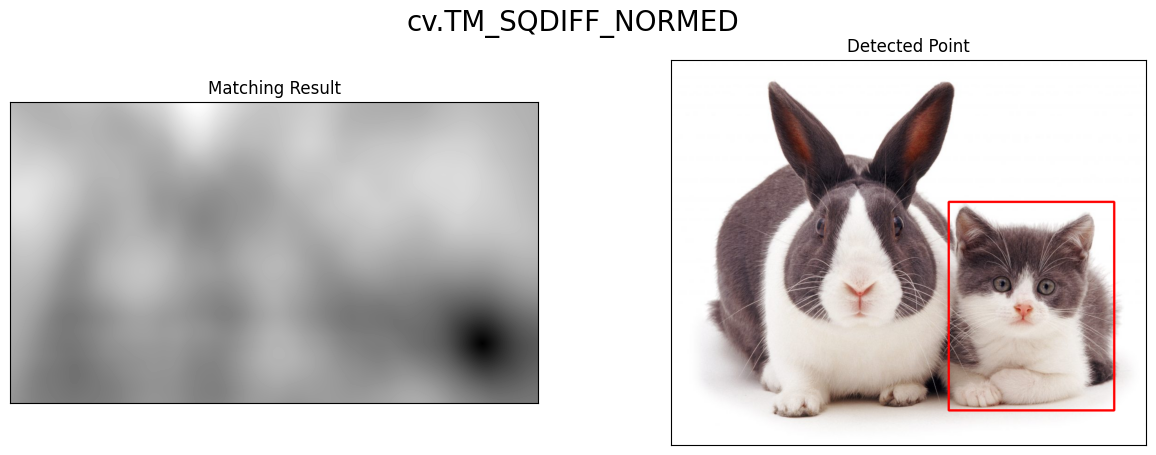

In [10]:
#definisikan method

methods = [
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED'
]

# perulangan untuk setiap method
for meth in methods:
  img = img_copy.copy()
  method = eval(meth)

  result = cv.matchTemplate(img_gray, template, method)
  min_val,max_val, min_loc, max_loc = cv.minMaxLoc(result)

  if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)

  # gambar persegi
  cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 3)

  # hasil
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
  ax1.imshow(result, cmap='gray')
  ax1.set_title('Matching Result')
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax2.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax2.set_title('Detected Point')
  ax2.set_xticks([])
  ax2.set_yticks([])
  fig.suptitle(meth, fontsize=20)
  plt.show()

## Template Matching Multiple Object

Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai 
berikut: 


(<matplotlib.image.AxesImage at 0x7ffb1d9ce680>,
 Text(0.5, 1.0, 'template imaga'))

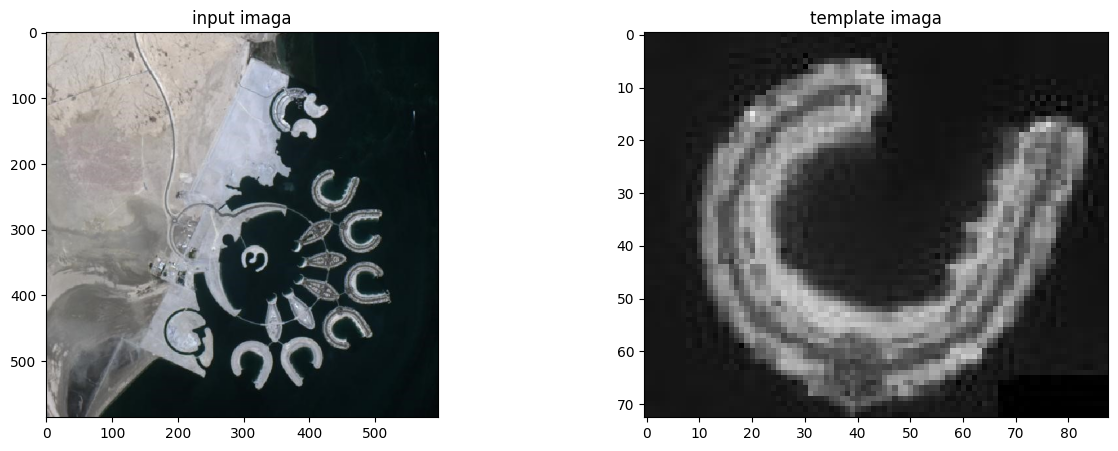

In [15]:
# pre processing

# load citra input

img_input = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/object detection/bahrain.jpg')
img_gray = cv.cvtColor(img_input,cv.COLOR_BGR2GRAY)
img_copy = img_input.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/object detection/bahrain-template.jpg',0)

#width dan height
w,h = template.shape[::-1]

#print
f, axarr = plt.subplots(1,2, figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img_input, cv.COLOR_BGR2RGB)), axarr[0].set_title("input imaga")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template imaga")

Total Object Found :  7


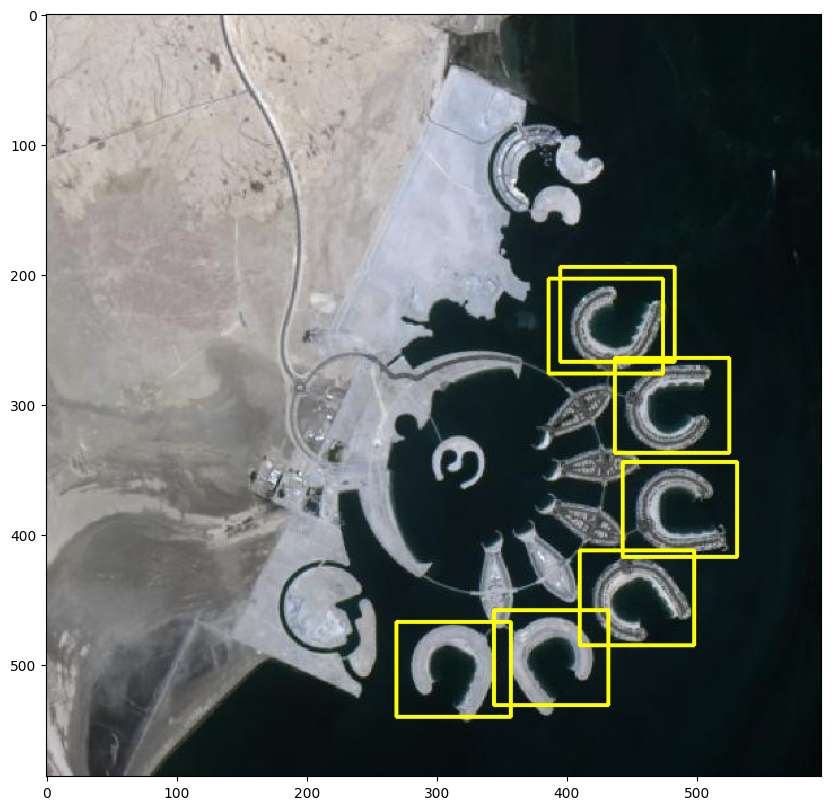

In [16]:
# penggunaan library openCV matchTemplate

result = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)

threshold = 0.45
loc = np.where(result >= threshold)

lspoint=[]
lspoint2=[]
count = 0

for pt in zip(*loc[::-1]):
  if pt[0] not in lspoint and pt[1] not in lspoint2:
    cv.rectangle(img_input, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
    for i in range(((pt[0])-9), ((pt[0])-9),1):
      lspoint.append(i)
    for j in range(((pt[1])-9), ((pt[1])+9),1):
      lspoint2.append(j)
    count += 1
  else:
    continue

print ("Total Object Found : ", count)

plt.figure(figsize=(10,45))
plt.imshow(cv.cvtColor(img_input,cv.COLOR_BGR2RGB))

## Edge Detection

Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

In [19]:
#load image input
img_input = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/object detection/car-park.jpg')
img_gray = cv.cvtColor(img_input,cv.COLOR_BGR2GRAY)

### a. Sobel Edge Detection

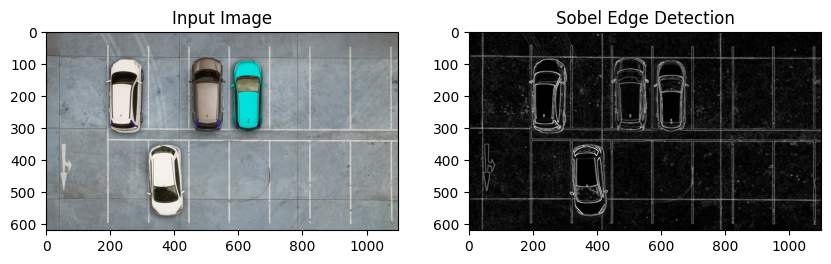

In [20]:
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)

abs_sobel_x = cv.convertScaleAbs(sobel_x)
abs_sobel_y = cv.convertScaleAbs(sobel_y)

sobel = cv.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img_input, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(sobel, cmap='gray')
ax[1].set_title('Sobel Edge Detection')
plt.show()

### Canny Edge Detection

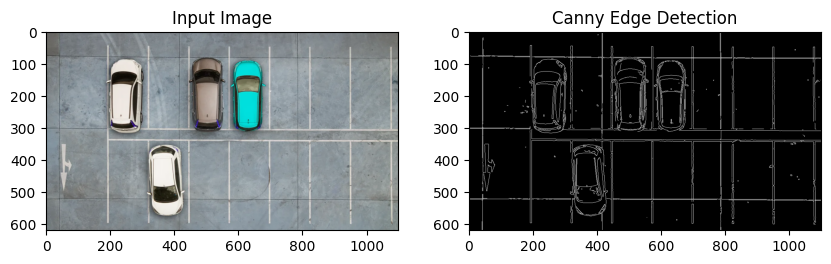

In [21]:
canny = cv.Canny(img_gray, 150,250)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img_input, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(canny, cmap='gray')
ax[1].set_title('Canny Edge Detection')
plt.show()

### Laplacian Edge Detection

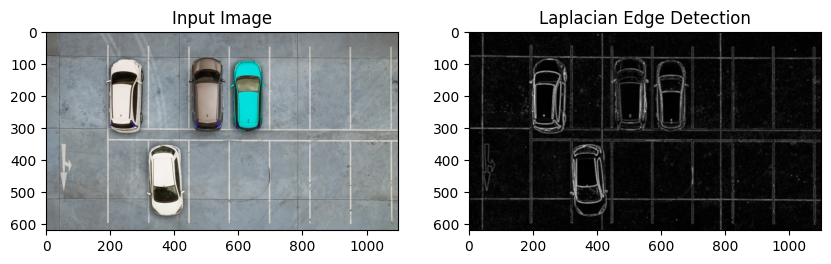

In [23]:
img = cv.GaussianBlur(img_gray,(3,3),0)
lap = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)
lap = cv.convertScaleAbs(lap)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img_input, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(lap, cmap='gray')
ax[1].set_title('Laplacian Edge Detection')
plt.show()

## Corner Detection

In [40]:
# Load image input
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/object detection/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada 
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan 
luaran sebagai berikut: 

### Harris Corner Detection

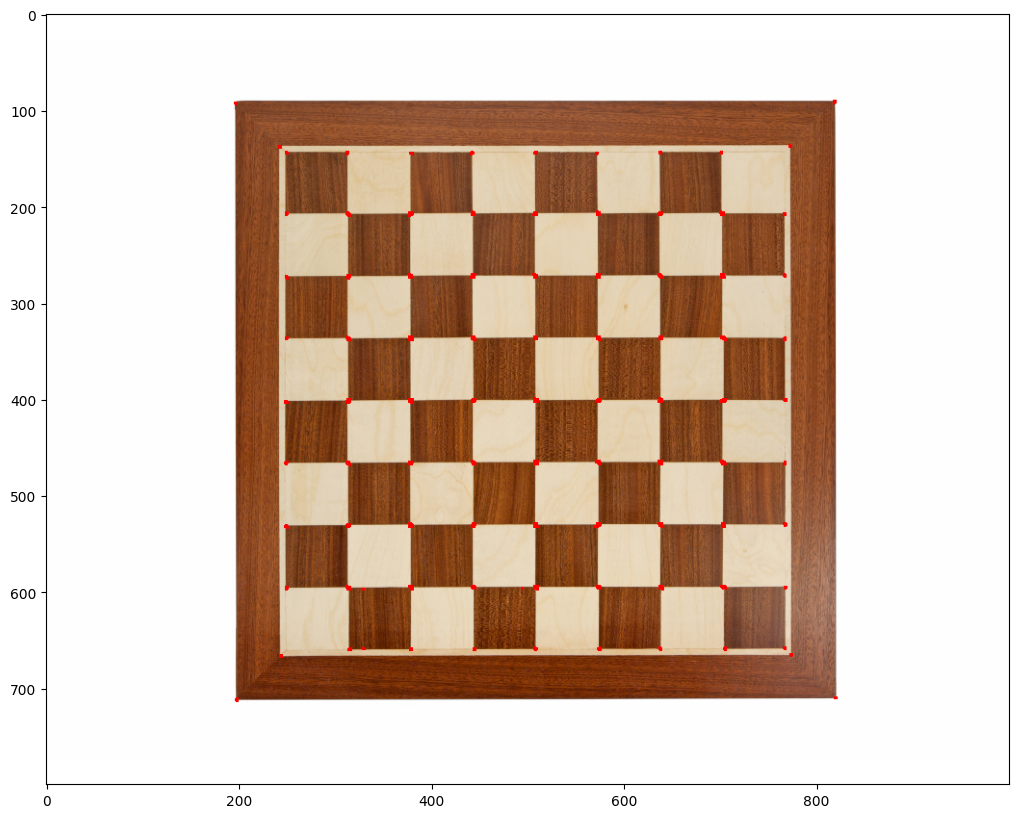

In [38]:
# Perform Harris corner detection
gray = np.float32(gray)
harris = cv.cornerHarris(gray, 2, 3, 0.04)

harris = cv.dilate(harris, None)

# Threshold the output
img[harris>0.01*harris.max()]=[0,0,255]

# Display the result
plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

### Shi-Tomasi Detection

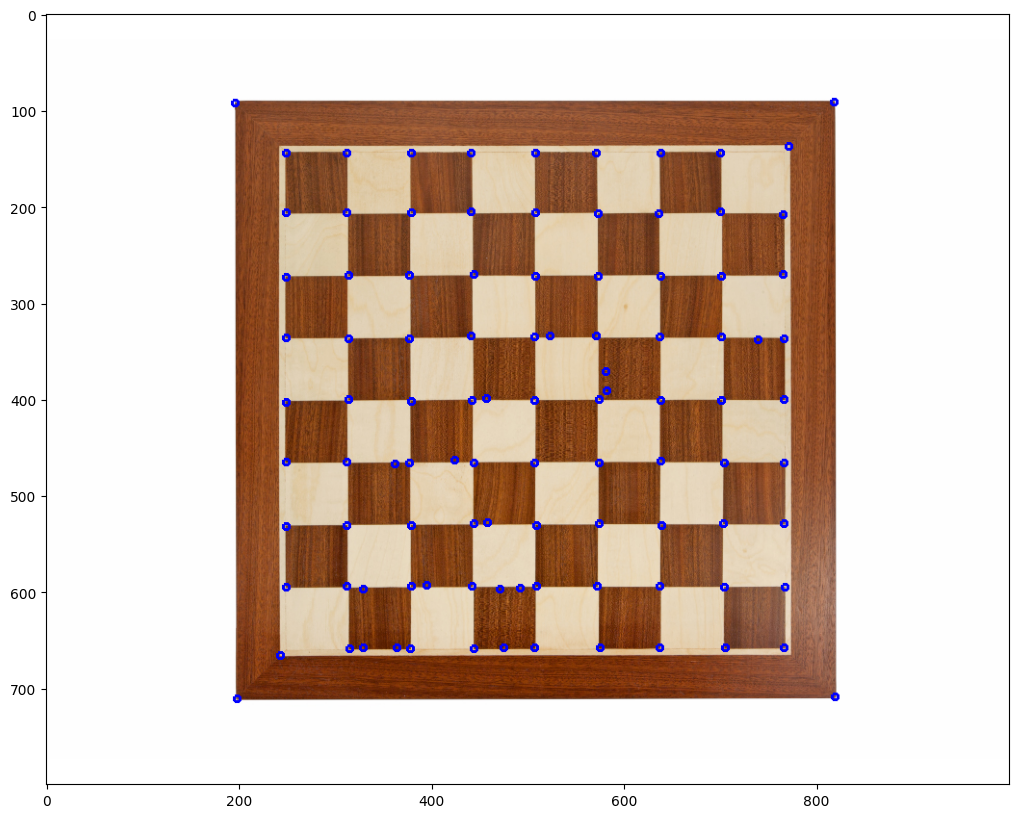

In [41]:
shi = cv.goodFeaturesToTrack(gray, 100,0.01,10)
shi = np.int0(shi)

for n in shi:
  x,y = n.ravel()
  cv.circle(img,(x,y),3,255,2)

# Display the result
plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Grid Detection

Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan 
teori, sehingga menghasilkan luaran sebagai berikut:

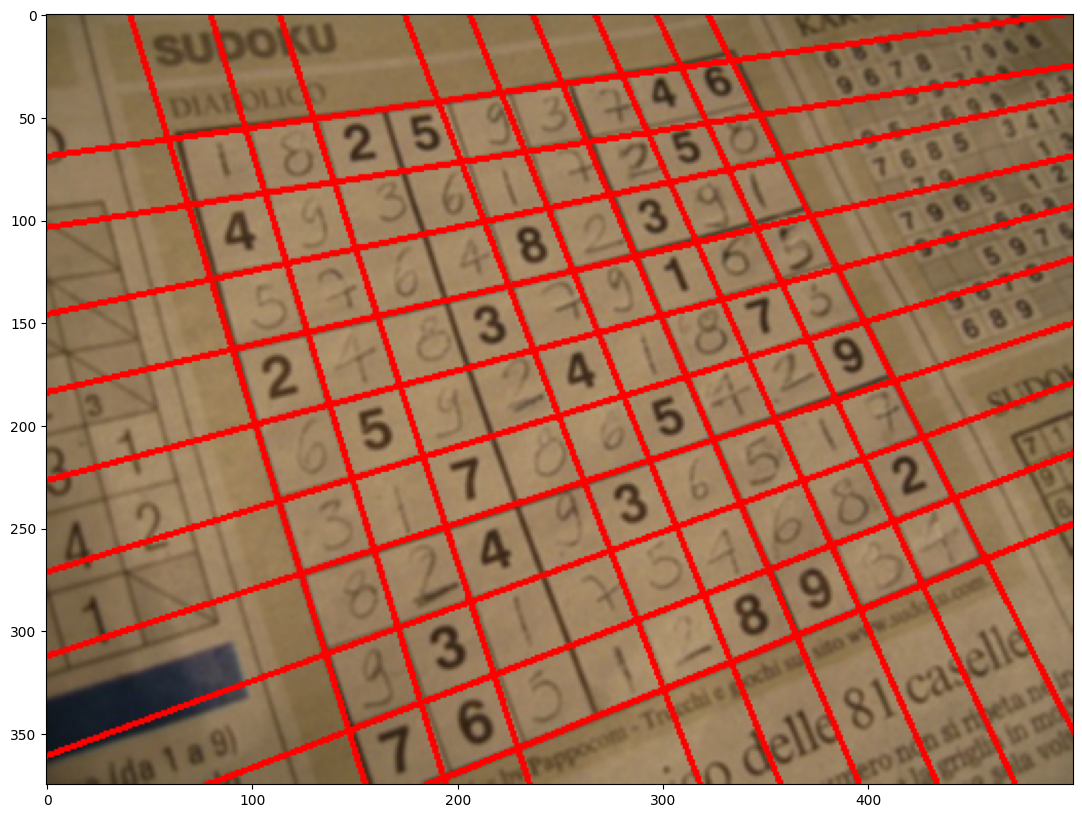

In [42]:
input_img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/object detection/sudoku.jpg')
gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edge = cv.Canny(gray, 90, 160, apertureSize = 3)

kernel = np.ones((3,3),np.uint8)
edge = cv.dilate(edge,kernel, iterations = 1)

kernel = np.ones((5,5),np.uint8)
edge = cv.erode(edge,kernel, iterations = 1)

lines = cv.HoughLines(edge,1,np.pi/180,160)

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)
        
plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

## Contour Detection

Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

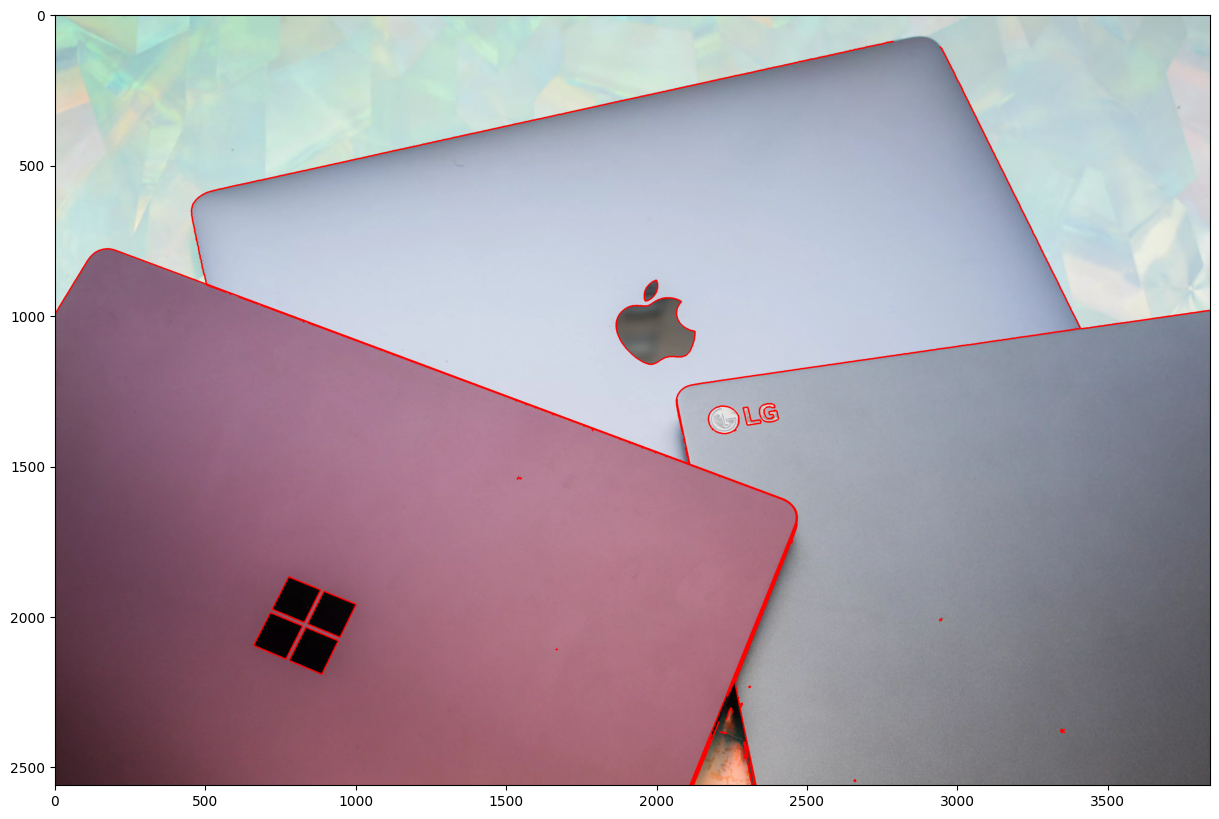

In [45]:
input_img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/lain lain/PVCK/image/object detection/laptop.jpg')
gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(input_img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))